In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [28]:
df=pd.read_csv('100kArtists.csv')

In [29]:
display(df)

,Unnamed: 0.1,Unnamed: 0,Event Date,# Shows,Headliner,Support,Venue,City,State,Country,...,35 to 44 years population,45 to 54 years population,55 to 59 years population,60 to 64 years population,65 to 74 years population,75 to 84 years population,85 years and over population,Median age,Median income,Mean income
0,0,0,2024-06-09,1.0,Jackie Venson,NaN,City Winery Boston,Boston,Massachusetts,United States,...,86950,68883,36479,32331,48205,22488,11343,32.9,89212,132509
1,1,1,2024-06-09,1.0,Night Ranger,Mckinley James,Rialto Square Theatre,Joliet,Illinois,United States,...,21535,22300,8367,6446,9622,4029,1737,34.3,84971,99841
2,2,2,2024-06-09,1.0,The Silos,David Gans,The Loft @ City Winery NYC,New York,New York,United States,...,1192645,1072881,546121,498975,763022,398657,173960,37.5,76607,122667
3,3,3,2024-06-08,1.0,Alicia Witt,NaN,Haymarket Lounge @ City Winery Boston,Boston,Massachusetts,United States,...,86950,68883,36479,32331,48205,22488,11343,32.9,89212,132509
4,4,4,2024-06-08,1.0,Matt York,NaN,Haymarket Lounge @ City Winery Boston,Boston,Massachusetts,United States,...,86950,68883,36479,32331,48205,22488,11343,32.9,89212,132509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5532,5532,5532,2023-05-01,1.0,Storm Large,NaN,City Winery Chicago,Chicago,Illinois,United States,...,390000,322013,154928,147739,211359,104397,45392,35.3,71673,108346
5533,5533,5533,2023-05-01,1.0,100 gecs,"Fever Ray, Machine Girl",The Anthem,Washington,District of Columbia,United States,...,108199,72665,33926,33010,49028,25256,10167,34.8,101722,150292
5534,5534,5534,2023-05-01,1.0,Billy Idol,NaN,UPMC Events Center,Coraopolis,Pennsylvania,United States,...,973,469,230,255,711,320,105,37.4,55714,64596
5535,5535,5535,2023-05-01,1.0,Patti Lupone,NaN,Dell Hall At The Long Center,Austin,Texas,United States,...,162077,114844,48982,43577,59182,23940,10470,34.2,86556,122474


In [30]:
display(len(df.columns))

61

In [54]:
#we want to predict "Avg. Gross USD"
features = ["Avg. Tickets Sold", "Ticket Price Avg. USD", "sp followers", "yt View Count", "yt Subscriber Count", "Mean income", "Median income"]
prediction_col = ["Avg. Gross USD"]

In [55]:
df_with_ticket_price = df.columns[df.columns.str.contains(pat = 'Price')]

In [56]:
display(df_with_ticket_price)

Index(['Ticket Price Min', 'Ticket Price Max', 'Ticket Price Avg. USD'], dtype='object')

In [58]:
revenue_df = df[features+prediction_col]
display(revenue_df)

,Avg. Tickets Sold,Ticket Price Avg. USD,sp followers,yt View Count,yt Subscriber Count,Mean income,Median income,Avg. Gross USD
0,97,29.95,60354.0,1.143849e+07,60700.0,132509,89212,2905.0
1,"1,281",50.87,726155.0,6.680518e+07,77200.0,99841,84971,65163.0
2,42,28.57,3464.0,3.073120e+05,1000.0,122667,76607,1200.0
3,75,31.60,3873.0,7.272910e+05,5700.0,132509,89212,2370.0
4,16,24.38,144.0,2.857000e+04,131.0,132509,89212,390.0
...,...,...,...,...,...,...,...,...
5532,304,23.02,12778.0,1.347848e+06,13500.0,108346,71673,6997.0
5533,"3,955",47.51,609863.0,1.218393e+08,328000.0,150292,101722,187905.0
5534,"3,571",58.54,1991332.0,1.095648e+09,919000.0,64596,55714,209061.5
5535,"1,192",80.58,38083.0,1.716647e+06,3710.0,122474,86556,96048.0


In [59]:
#checking total null count

print(df.isnull().sum().sum())

15266


In [60]:
# attempt to only get convert non null values to int, but problems arose.

# def str_to_int_not_null(series):
#     if series.notnull().any():
#         # Filter out null values and convert the remaining to integers
#         return series.dropna().astype(int)
#     else:
#         # Return an empty Series with the same type if all values are null
#         return pd.Series(dtype=int)

In [61]:
numeric_df = revenue_df.select_dtypes(include=['number'])

In [62]:
df.fillna(numeric_df.mean(axis = 1),inplace = True)        

In [63]:
print(numeric_df.isnull().sum().sum())
display(numeric_df)

0


,Ticket Price Avg. USD,sp followers,yt View Count,yt Subscriber Count,Mean income,Median income,Avg. Gross USD
0,29.95,60354.0,1.143849e+07,60700.0,132509,89212,2905.0
1,50.87,726155.0,6.680518e+07,77200.0,99841,84971,65163.0
2,28.57,3464.0,3.073120e+05,1000.0,122667,76607,1200.0
3,31.60,3873.0,7.272910e+05,5700.0,132509,89212,2370.0
4,24.38,144.0,2.857000e+04,131.0,132509,89212,390.0
...,...,...,...,...,...,...,...
5532,23.02,12778.0,1.347848e+06,13500.0,108346,71673,6997.0
5533,47.51,609863.0,1.218393e+08,328000.0,150292,101722,187905.0
5534,58.54,1991332.0,1.095648e+09,919000.0,64596,55714,209061.5
5535,80.58,38083.0,1.716647e+06,3710.0,122474,86556,96048.0


In [136]:
# assign features and target variable
x = revenue_df[features]
y = revenue_df["Avg. Gross USD"]

print("x")
display(x)
print("y")
display(y)

x


,Avg. Tickets Sold,Ticket Price Avg. USD,sp followers,yt View Count,yt Subscriber Count,Mean income,Median income
0,97,29.95,60354.0,1.143849e+07,60700.0,132509,89212
1,"1,281",50.87,726155.0,6.680518e+07,77200.0,99841,84971
2,42,28.57,3464.0,3.073120e+05,1000.0,122667,76607
3,75,31.60,3873.0,7.272910e+05,5700.0,132509,89212
4,16,24.38,144.0,2.857000e+04,131.0,132509,89212
...,...,...,...,...,...,...,...
5532,304,23.02,12778.0,1.347848e+06,13500.0,108346,71673
5533,"3,955",47.51,609863.0,1.218393e+08,328000.0,150292,101722
5534,"3,571",58.54,1991332.0,1.095648e+09,919000.0,64596,55714
5535,"1,192",80.58,38083.0,1.716647e+06,3710.0,122474,86556


y


0         2905.0
1        65163.0
2         1200.0
3         2370.0
4          390.0
          ...   
5532      6997.0
5533    187905.0
5534    209061.5
5535     96048.0
5536    442512.5
Name: Avg. Gross USD, Length: 5537, dtype: float64

In [137]:
print(x.dtypes)
print(y.dtypes)

Avg. Tickets Sold         object
Ticket Price Avg. USD    float64
sp followers             float64
yt View Count            float64
yt Subscriber Count      float64
Mean income                int64
Median income              int64
dtype: object
float64


In [138]:
x["Avg. Tickets Sold"] = x["Avg. Tickets Sold"].str.replace(",","").astype("int")
print(x.dtypes)

Avg. Tickets Sold          int64
Ticket Price Avg. USD    float64
sp followers             float64
yt View Count            float64
yt Subscriber Count      float64
Mean income                int64
Median income              int64
dtype: object


/var/folders/wh/nnzlp3517cncmt5bt579qvrh0000gn/T/ipykernel_27625/3978891635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Avg. Tickets Sold"] = x["Avg. Tickets Sold"].str.replace(",","").astype("int")


In [139]:
forestRegressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
forestRegressor.fit(x,y)

/Users/simonk/miniconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [140]:
# Access the OOB Score
oob_score = forestRegressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = forestRegressor.predict(x)
 
# Evaluating the model
mse = mean_squared_error(y, predictions)
print(f'MSE: {mse}')
 
r2 = r2_score(y, predictions)
print(f'R^2: {r2}')

Out-of-Bag Score: 0.9884677872113713
MSE: 8455874.867127698
R^2: 0.9992817771507913


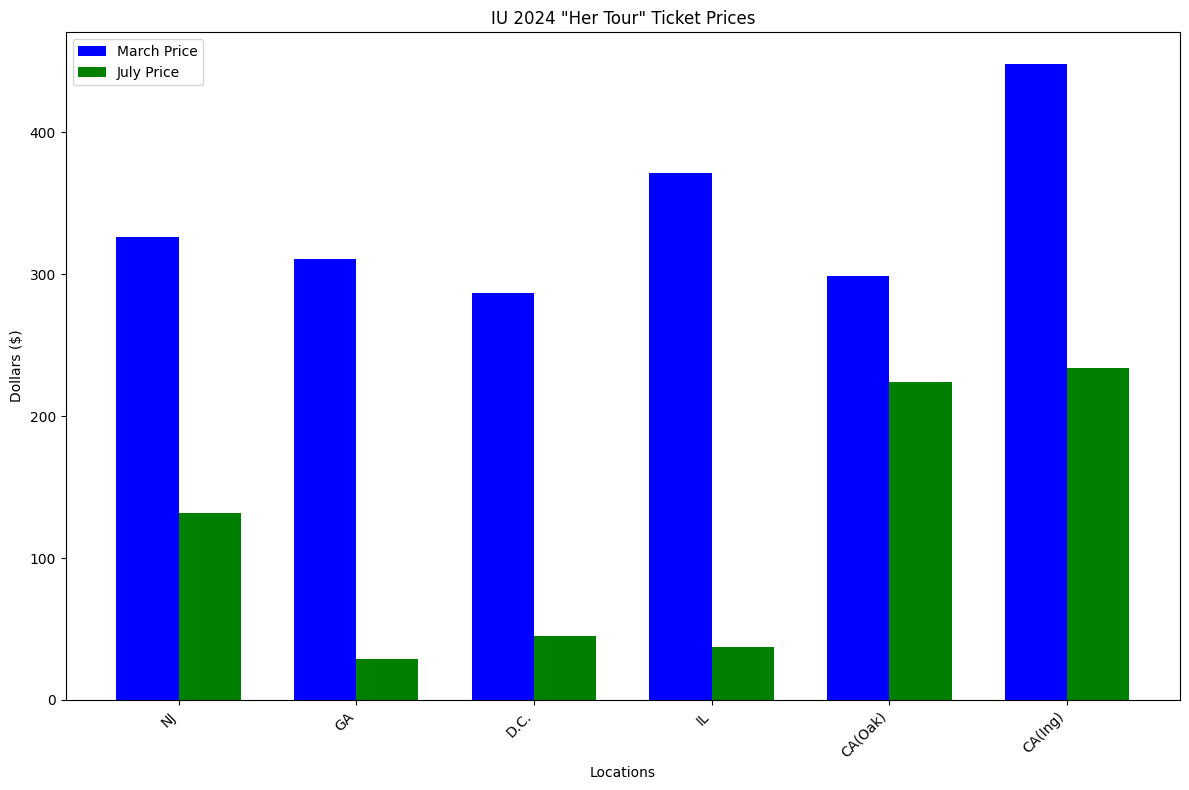

In [141]:
#Because the OOB score is very close to 1(0.988), it indicates that it will perform well on unseen data.

#According to IU's 2024 concert data, 
#There were
# Seoul, South Korea: KSPO Dome with 60,000 attendees over four nights.
# Taipei, Taiwan: Taipei Arena with 24,000 attendees over two nights.
# Singapore: Singapore Indoor Stadium with 17,400 attendees over two nights.
# Manila, Philippines: Philippine Arena with 37,000 attendees.
# London, England: OVO Arena Wembley with 10,000 attendees.
# Nonthaburi, Thailand: Impact Challenger Hall 1 with 28,000 attendees over two nights.

#To calculate the cost
#according to a table from https://nypost.com/2024/07/02/entertainment/iu-her-ticket-prices-dropping-where-to-buy-best-deals-schedule/,
# IU's 2024 World tour ticket price has been dropping since March. 
#Below are her 2024 World Tour ticket start price changes. from March to July
#I will abbreviate Oakland and Inglewood to CA(Oak) and CA(Ing) respectively. 
location = ["NJ","GA","D.C.","IL","CA(Oak)","CA(Ing)"]
march_price = [326,311,287,371,299,448]
july_price = [132,29,45,37,224,234]

# plt.bar(location,march_price)
# plt.xlabel("locations")
# plt.ylabel("dollars($)")
# plt.legend()

# plt.bar(location,july_price, label = "july price")
# plt.title("IU 2024 \"Her Tour\" Ticket Price ")
# plt.xlabel("locations")
# plt.ylabel("dollars($)")
# plt.legend(loc="upper left")

n = len(location)
x = np.arange(n)
bar_width = 0.35
fig, ax = plt.subplots(figsize=(12, 8))

#march ticket price
bars1 = ax.bar(x - bar_width/2, march_price, bar_width, label='March Price', color='b')
#july ticket price
bars2 = ax.bar(x + bar_width/2, july_price, bar_width, label='July Price', color='g')

ax.set_xlabel('Locations')
ax.set_ylabel('Dollars ($)')
ax.set_title('IU 2024 "Her Tour" Ticket Prices')
ax.set_xticks(x)
ax.set_xticklabels(location, rotation=45, ha='right')
ax.legend(loc="upper left")

# Display the bar graph
plt.tight_layout()
plt.show()

In [142]:
#From These results only show the starting price for the tickets. From research, the average ticket price range from the starting price+100 
#to starting price+300. It is okay to be not accurate with these values as few hundred is minimal in the larger scale, so I will use the 
#value of starting price+200

In [143]:
march_df = pd.DataFrame({"average march ticket price(USD)":march_price})
march_df = march_df + 200
display(march_df)

july_df = pd.DataFrame({"average july ticket price(USD)":july_price})
july_df = july_df + 200
display(july_df)
# predictions_march = forestRegressor.predict(march_df)
# print(predictions_march)

,average march ticket price(USD)
0,526
1,511
2,487
3,571
4,499
5,648


,average july ticket price(USD)
0,332
1,229
2,245
3,237
4,424
5,434


In [145]:
#I will fit and predict the model on the two march and july dates below.
test = march_df
# Generate missing features for test data
# Assuming default values or mean values from training data
#"Ticket Price Avg. USD", "sp followers", "yt View Count", "yt Subscriber Count", "Mean income", "Median income"
default_values = {
    "Avg. Tickets Sold": x["Avg. Tickets Sold"].mean(),
    "sp followers": x["sp followers"].mean(),
    "yt View Count": x["yt View Count"].mean(),
    "yt Subscriber Count": x[ "yt Subscriber Count"].mean(),
    "Mean income": x["Mean income"].mean(),
    "Median income": x["Median income"].mean(),
}

# Fill missing features
for feature in default_values:
    if feature not in test.columns:
        test[feature] = default_values[feature]
        


# Ensure columns are in the same order as training data
test = test[x.columns]

# Predict using the trained model
predictions = forestRegressor.predict(test)
print(f"Predicted values: {predictions}")




IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices